In [43]:
# https://wikidocs.net/60324

---
# 05. 소프트맥스 회귀로 MNIST 데이터 분류하기

In [44]:
# 라이브러리
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [45]:
# 현재 환경에서 GPU 연산이 가능하다면 하고 그렇지 않다면 CPU 연산을 돌리도록 함
USE_CUDA = torch.cuda.is_available()    # 가능하다면 Truem 아니면 False
device = torch.device('cuda' if USE_CUDA else 'cpu')
print('다음 기기로 학습: ', device)

다음 기기로 학습:  cuda


In [46]:
# 랜덤시드를 고정
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [47]:
# 하이퍼파라미터를 변수로 지정
training_epochs = 15
batch_size = 100

In [48]:
# torchvision.datasets.dsets.MNIST 를 사용해 데이터셋 불러오기

# MNIST dataset
mnist_train = dsets.MNIST(root='D:/chchdata/dataset/MNIST_data/',   # 데이터 다운받을 경로
                        train = True,                               # 학습 여부
                        transform= transforms.ToTensor(),           # 데이터를 토치로 변환
                        download = True) 

mnist_test = dsets.MNIST(root='D:/chchdata/dataset/MNIST_data/',
                        train = False,
                        transform= transforms.ToTensor(),
                        download = True)

In [49]:
# dataloader를 이용해 데이터셋을 불러오자
data_loader = DataLoader(dataset = mnist_train, # 로드할 대상
                        batch_size = batch_size,
                        shuffle = True,
                        drop_last = True)       # 마지막 배치를 버릴 것인지

In [50]:
# 모델을 설계하자
# input_dim = 748, output_dim = 10 이다

linear = nn.Linear(784, 10, bias=True).to(device)
# to() : 연산을 어디서 수행할지 정한다. 아무것도 지정하지 않았을 때는 cpu이다

In [51]:
# 비용함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [52]:
# 학습시키자

for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # batch_size가 100 이므로 아래 텐서의 모양은 (100, 784)가 된다
        X = X.view(-1, 28*28).to(device)
        # 레이벌은 원핫벡터가 아닌 0~9까지의 정수로 들어간다
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost: ', '{:.9f}'.format(avg_cost))

print('Learning Finished')

Epoch: 0001 cost:  0.535150588
Epoch: 0002 cost:  0.359577715
Epoch: 0003 cost:  0.331264228
Epoch: 0004 cost:  0.316404670
Epoch: 0005 cost:  0.307106972
Epoch: 0006 cost:  0.300456524
Epoch: 0007 cost:  0.294933408
Epoch: 0008 cost:  0.290956199
Epoch: 0009 cost:  0.287074089
Epoch: 0010 cost:  0.284515619
Epoch: 0011 cost:  0.281914055
Epoch: 0012 cost:  0.279526860
Epoch: 0013 cost:  0.277636617
Epoch: 0014 cost:  0.275874794
Epoch: 0015 cost:  0.274422765
Learning Finished


Accuracy:  0.8883000016212463
Label:  2
Prediction:  2


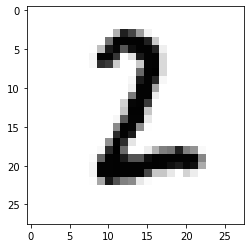

In [61]:
# 테스트 데이터를 사용하여 모델을 테스트

with torch.no_grad():  # torch.no_grad()를 사용하면 gradient를 수행하지 않음
    X_test = mnist_test.test_data.view(-1, 28*28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy  = correct_prediction.float().mean()
    print('Accuracy: ', accuracy.item())

    # mnist 테스트 데이터에서 무작위로 하나를 뽑아서 예측해보자
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r+1].view(-1, 28*28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r+1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
    plt.show()